## federated learning

In [34]:

def plot_metric(metric, metric_label, round_label, limits=(0, 1)):
    import os
    import pandas as pd
    import matplotlib.pyplot as plt

    # Define the base directory where your data is stored
    base_dir = 'results'  # Change this to your actual path

    # List of specific anon_methods to process
    anon_methods = ['gfkmc', 'mondrian', 'cb', 'tdg', 'original']
    legend_labels = ['GFKMC', 'Mondrian', 'CB', 'TDG', 'Original']
    # anon_methods = ['cb', 'mondrian', 'original', 'tdg']

    # Loop through each k directory
    for k in [3, 5, 10, 20]:  # Adjust the range based on your k values
        plt.figure(figsize=(12, 6))
        print(f'k={k}')

        for anon_method in anon_methods:
            if anon_method == 'original':
                metrics_file_path = os.path.join(base_dir, anon_method, str(10), f'metrics_{metric}.csv')
            else:
                metrics_file_path = os.path.join(base_dir, anon_method, str(k), f'metrics_{metric}.csv')

            if os.path.exists(metrics_file_path):
                # Read the metrics.csv file
                metrics_df = pd.read_csv(metrics_file_path)

                if metric == 'auc':
                    plt.plot(metrics_df['round'], metrics_df[metric.upper()], marker='o', linestyle='-', label=anon_method)
                else:
                    plt.plot(metrics_df['round'], metrics_df[metric], marker='o', linestyle='-', label=anon_method)
            else:
                print(f"Metrics file not found for {anon_method} at k={k}: {metrics_file_path}")

        # Set plot title and labels
        # plt.title(f'Accuracy over Rounds for k={k}')
        plt.xlabel(round_label, fontsize=fontsize)
        plt.ylabel(metric_label, fontsize=fontsize)
        plt.xticks([1,10,20,30,40,50,60,70,80,90,100], fontsize=fontsize-2)  # Adjust the range based on your actual round values
        plt.yticks(fontsize=fontsize-2)
        plt.grid()
        plt.ylim(*limits)
        legend = plt.legend(fontsize=fontsize)

        for text, new_label in zip(legend.get_texts(), legend_labels):
            text.set_text(new_label)

        plt.show()


k=3


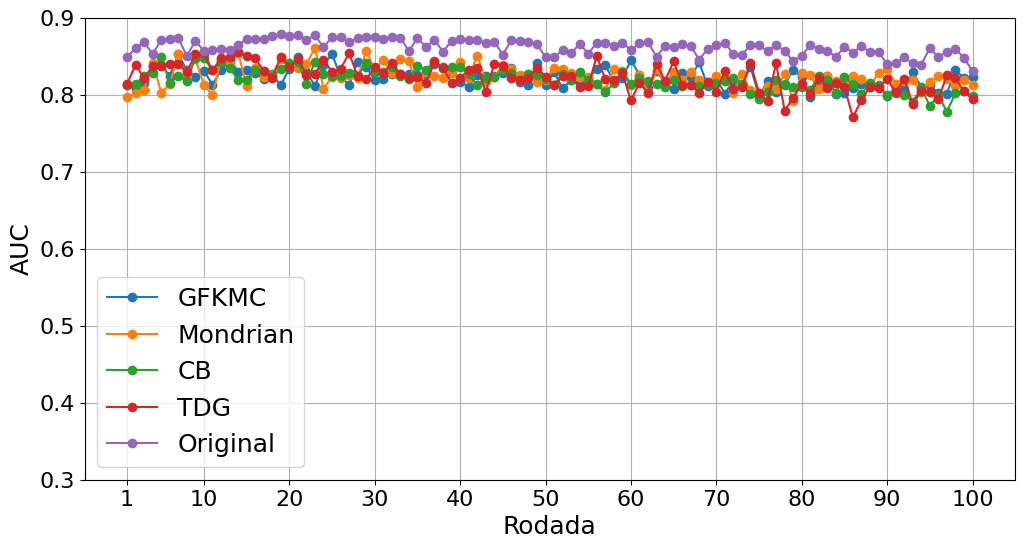

k=5


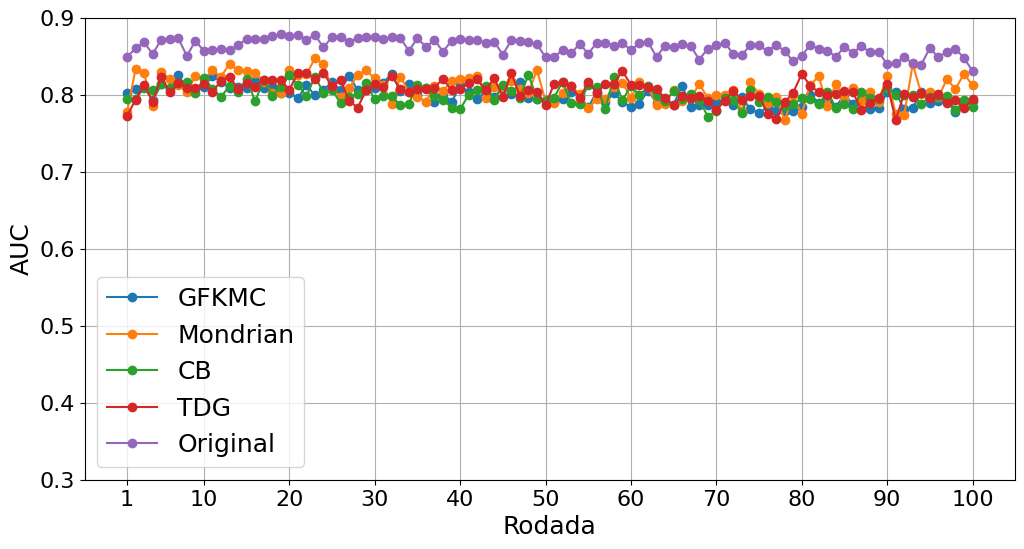

k=10


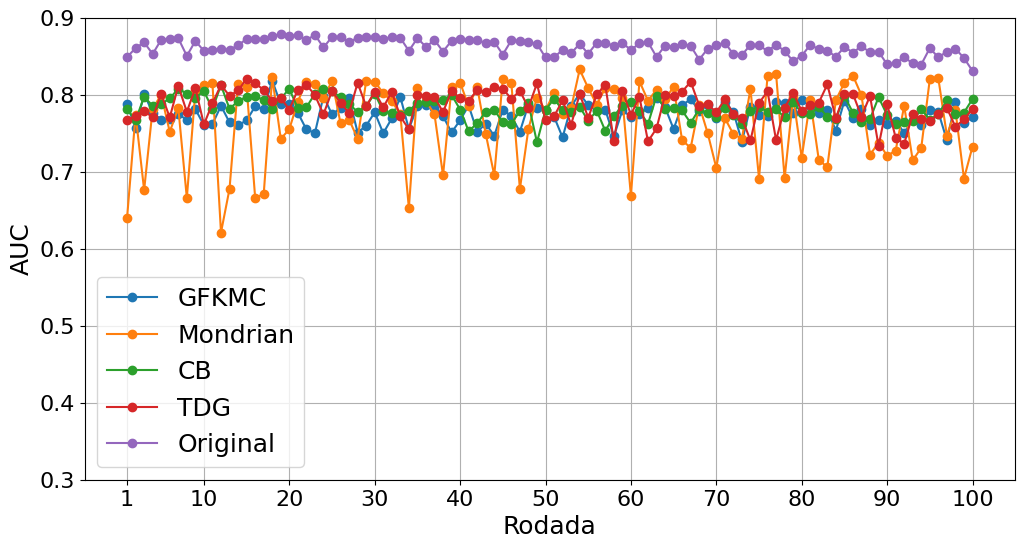

k=20


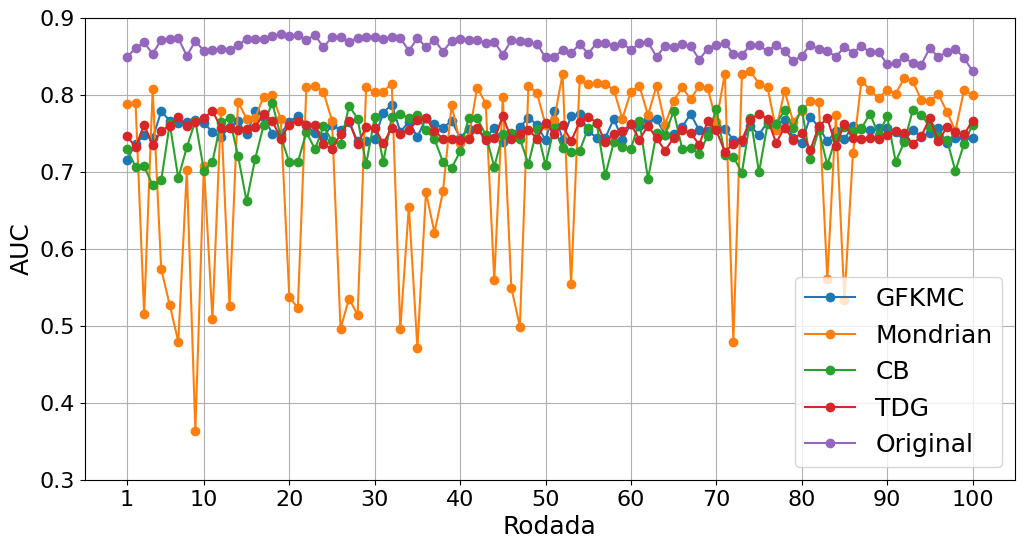

In [35]:
plot_metric('auc', 'AUC', 'Rodada', (0.30, 0.9))

k=3


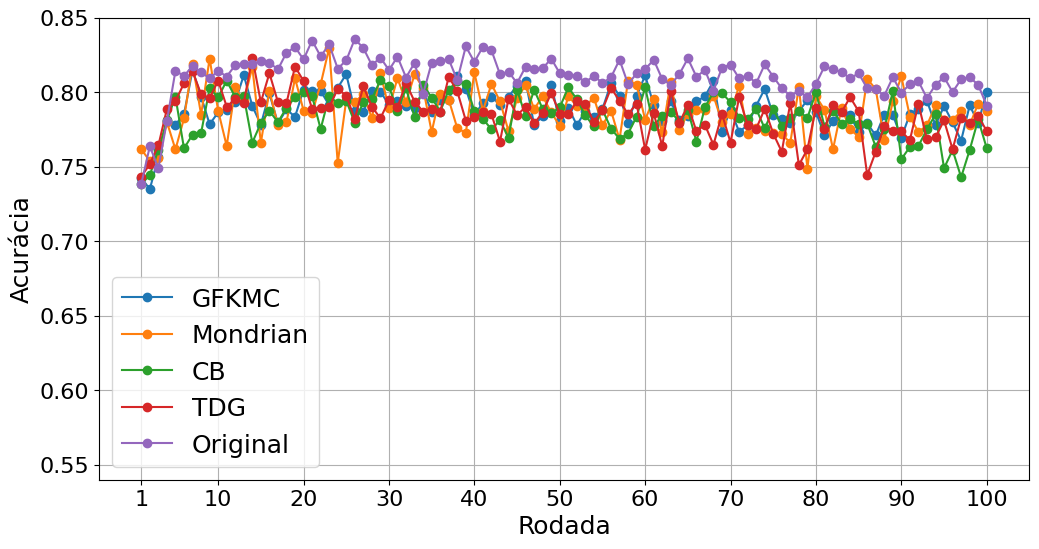

k=5


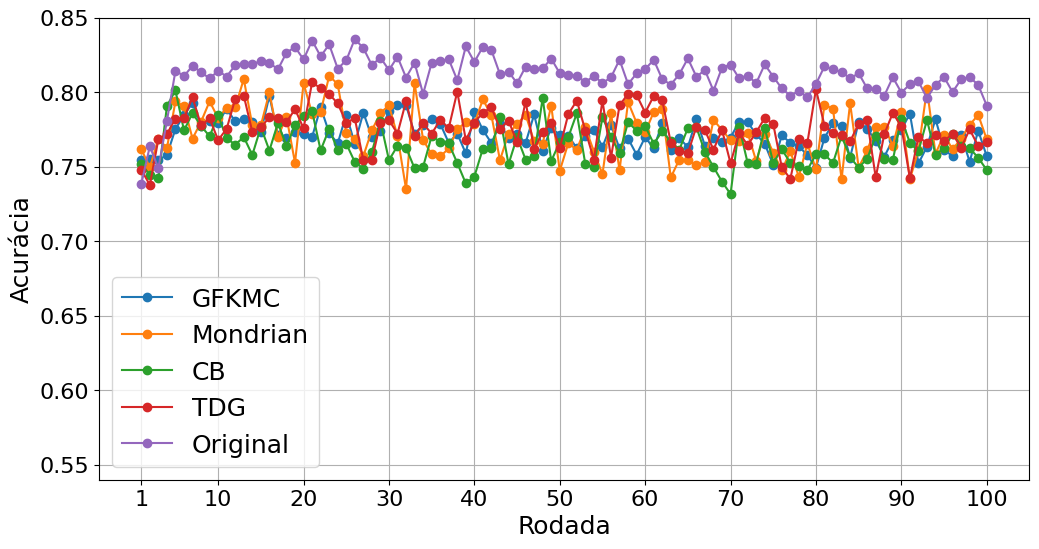

k=10


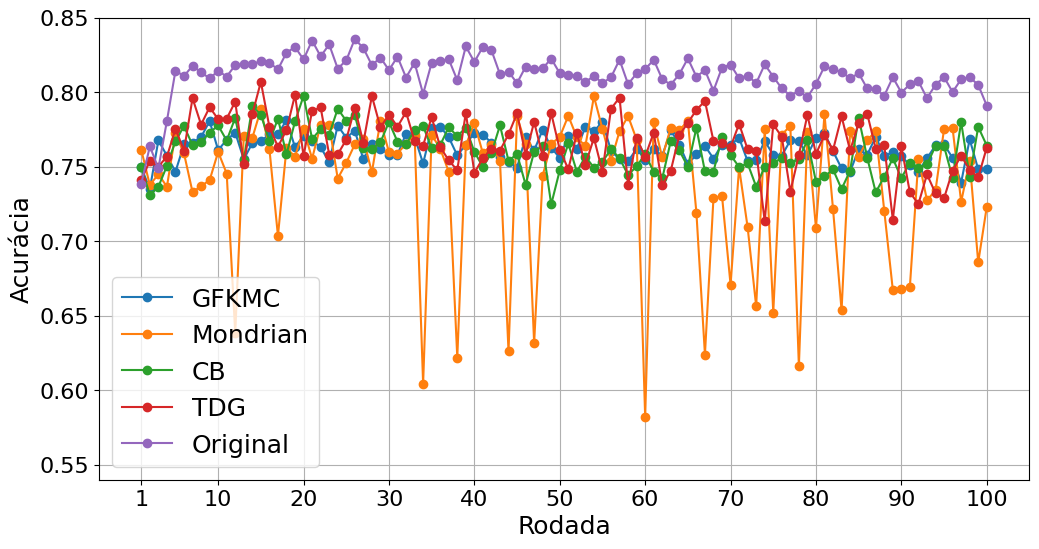

k=20


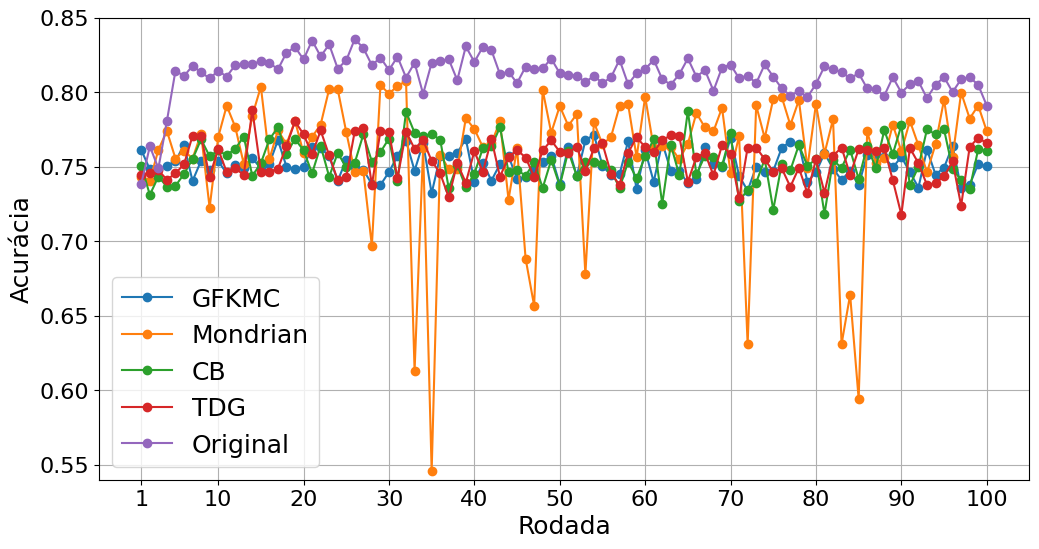

In [42]:
plot_metric('accuracy', 'Acurácia', 'Rodada', (0.54, 0.85))
